In [1]:
# import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset using read_csv() 
census_csv = pd.read_csv('census_data.csv')
test_csv = pd.read_csv('testing.csv')
train_csv = pd.read_csv('training.csv')

#Data Quality Analysis (DQA)


In [3]:
#perform a data  quality analysis, find missing values, outliers, etc.

In [4]:
census_csv.shape

(48842, 11)

In [5]:
census_csv.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [6]:
census_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [7]:
#display descriptive statistics of ea col 
census_csv.describe(include='all')

hours_per_week_bin occupation_bin  ...   flag             y
count               48842          48842  ...  48842  48842.000000
unique                  5              5  ...      2           NaN
top              b. 31-40   c. Mid - Mid  ...  train           NaN
freq                26639          13971  ...  32561           NaN
mean                  NaN            NaN  ...    NaN      0.239282
std                   NaN            NaN  ...    NaN      0.426649
min                   NaN            NaN  ...    NaN      0.000000
25%                   NaN            NaN  ...    NaN      0.000000
50%                   NaN            NaN  ...    NaN      0.000000
75%                   NaN            NaN  ...    NaN      0.000000
max                   NaN            NaN  ...    NaN      1.000000

[11 rows x 11 columns]

In [8]:
#perform data cleansing and transformation

In [9]:
census_csv.head()

hours_per_week_bin occupation_bin  msr_bin  ...            age_bin   flag  y
0           b. 31-40   b. Mid - Low   b. Mid  ...   d. 36-40 & 56-60  train  0
1            a. 0-30        e. High  c. High  ...           e. 40-55  train  0
2           b. 31-40         a. Low   b. Mid  ...   d. 36-40 & 56-60  train  0
3           b. 31-40         a. Low  c. High  ...           e. 40-55  train  0
4           b. 31-40        e. High  c. High  ...  b. 26-30 & 71-100  train  0

[5 rows x 11 columns]

In [10]:
#It is a pretty clean data.
#There's no null value, and all the columns are necessary, 
    #including the flag and y col which will be used during EDA

#As a result, I deceide to keep the original dataset without change

#Exploratory Data Analysis (EDA)

In [11]:
#perform EDA of the income group with respect to 7 explanatory variables:
    #1.age 2.Capital Gain/Loss 3.Education 4.Hours per week 
        #5.Marriage Status&relationship 6.Occupation 7.Race&Sex

#1.age_bin 2.capital_gl_bin 3.education_bin 4.hours_per_week_bin
#5.msr_bin 6.occupation_bin 7.race_sex_bin


In [12]:
#display graphical representations 


In [13]:
#display for variable: Age

#labels = ['0-25','26-30 & 71-100','31-35 & 61-70','36-40 & 56-60','40-55']

#the distribution table for dependent variable 
#yhist = plt.hist('workclass_bin', data = census_csv)

#the distribution table for independent variable 
#axes = plt.axes()
#tickvalues = range(0,len(census_csv['age_bin']))
#plt.figure(figsize=(20,10))
#plt.xticks(ticks= tickvalues, labels = census_csv.age_bin, rotation = 'vertical')
#plt.hist('age_bin', data = census_csv, bins = 5)
#plt.xlabel('Age')
#plt.ylabel('Quantity')

#from raw value to percentage 
#totals = i + j for i,j in zip(census_csv[])

#lim = census_csv['age_bin'].max()
#bins = np.linspace(0,lim,(lim/lim*(1/5))) #unsupported operand type for 'str'
#age_binned = pd.cut(census_csv['age_bin'], bins)
#chart = pd.crosstab(age_binned,census_csv['workclass_bin'])
#normalize chart and plotting chart 
#chart.div(chart.sum(1).astype(float), axis = 0).plot(kind='bar',
#                                                     stacked=True)
#plt.xlabel('Age Groups')
#plt.ylabel('Distribution')


In [14]:
#create pivot table for variable: age
table_a = census_csv.pivot_table(census_csv, 
                               index = ['age_bin','workclass_bin'])
table_a['% of y'] = (table_a.y/table_a.groupby(level=0).y.transform(sum) * 100)
table_a

y     % of y
age_bin           workclass_bin                     
a. 0-25           a. no income   0.003687  16.026793
                  b. income      0.019316  83.973207
b. 26-30 & 71-100 a. no income   0.078775  35.556957
                  b. income      0.142770  64.443043
c. 31-35 & 61-70  a. no income   0.179487  42.029228
                  b. income      0.247566  57.970772
d. 36-40 & 56-60  a. no income   0.158845  32.065459
                  b. income      0.336532  67.934541
e. 40-55          a. no income   0.183908  32.213272
                  b. income      0.387000  67.786728

In [15]:
#create pivot table for variable: 2.Capital Gain/Loss 
table_c = census_csv.pivot_table(census_csv, 
                               index = ['capital_gl_bin','workclass_bin'])
table_c['% of y'] = (table_c.y/table_c.groupby(level=0).y.transform(sum) * 100)
table_c

y     % of y
capital_gl_bin workclass_bin                     
a. = 0         a. no income   0.070141  26.260324
               b. income      0.196958  73.739676
b. < 0         a. no income   0.225490  30.483579
               b. income      0.514220  69.516421
c. > 0         a. no income   0.369318  37.006629
               b. income      0.628660  62.993371

In [16]:
#create pivot table for variable: 3.Education 
table_e = census_csv.pivot_table(census_csv, 
                               index = ['education_bin','workclass_bin'])
table_e['% of y'] = (table_e.y/table_e.groupby(level=0).y.transform(sum) * 100)
table_e

y     % of y
education_bin workclass_bin                     
a. Low        a. no income   0.023438  27.805631
              b. income      0.060853  72.194369
b. Mid        a. no income   0.076586  28.931317
              b. income      0.188132  71.068683
c. Bachelors  a. no income   0.237154  36.167650
              b. income      0.418554  63.832350
d. Masters    a. no income   0.432836  43.944535
              b. income      0.552124  56.055465
e. High       a. no income   0.547619  42.544843
              b. income      0.739538  57.455157

In [17]:
#create pivot table for variable:4.Hours per week 
table_h = census_csv.pivot_table(census_csv, 
                               index = ['hours_per_week_bin','workclass_bin'])
table_h['% of y'] = (table_h.y/table_h.groupby(level=0).y.transform(sum) * 100)
table_h

y     % of y
hours_per_week_bin workclass_bin                     
a. 0-30            a. no income   0.072309  52.271860
                   b. income      0.066024  47.728140
b. 31-40           a. no income   0.084375  28.717778
                   b. income      0.209433  71.282222
c. 71-100          a. no income   0.150000  29.668553
                   b. income      0.355586  70.331447
d. 41-50 & 61-70   a. no income   0.207547  34.372317
                   b. income      0.396274  65.627683
e. 51-60           a. no income   0.259259  37.298448
                   b. income      0.435835  62.701552

In [18]:
#create pivot table for variable: 5.Marriage Status&relationship 
table_m = census_csv.pivot_table(census_csv, 
                               index = ['msr_bin','workclass_bin'])
table_m['% of y'] = (table_m.y/table_m.groupby(level=0).y.transform(sum) * 100)
table_m

y     % of y
msr_bin workclass_bin                     
a. Low  a. no income   0.000912   4.875738
        b. income      0.017801  95.124262
b. Mid  a. no income   0.036585  26.309532
        b. income      0.102472  73.690468
c. High a. no income   0.258206  35.994610
        b. income      0.459140  64.005390

In [19]:
#create pivot table for variable: 6.Occupation 
table_o = census_csv.pivot_table(census_csv, 
                               index = ['occupation_bin','workclass_bin'])
table_o['% of y'] = (table_o.y/table_o.groupby(level=0).y.transform(sum) * 100)
table_o

y      % of y
occupation_bin workclass_bin                      
a. Low         a. no income   0.250000   84.016727
               b. income      0.047560   15.983273
b. Mid - Low   a. no income   0.094259   42.017534
               b. income      0.130074   57.982466
c. Mid - Mid   a. no income   0.000000    0.000000
               b. income      0.239046  100.000000
d. Mid - High  b. income      0.299712  100.000000
e. High        a. no income   0.000000    0.000000
               b. income      0.464388  100.000000

In [20]:
#create pivot table for variable: 7.Race&Sex
table_r = census_csv.pivot_table(census_csv, 
                               index = ['race_sex_bin','workclass_bin'])
table_r['% of y'] = (table_r.y/table_r.groupby(level=0).y.transform(sum) * 100)
table_r

y     % of y
race_sex_bin workclass_bin                     
a. Low       a. no income   0.036036  36.821735
             b. income      0.061830  63.178265
b. Mid       a. no income   0.064123  32.313421
             b. income      0.134319  67.686579
c. High      a. no income   0.130814  28.681951
             b. income      0.325271  71.318049

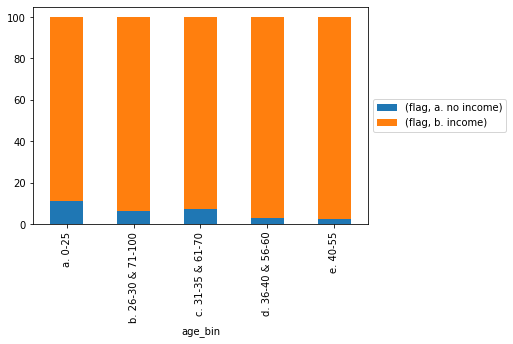

In [21]:
#1.age: age_bin 
table_a2 = census_csv.pivot_table(values=['flag'],
                                 index=['age_bin'], 
                                 columns=['workclass_bin'],
                                 aggfunc='count')
table_a2 = table_a2.apply(lambda c: c / c.sum() * 100, axis=1)
table_a2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

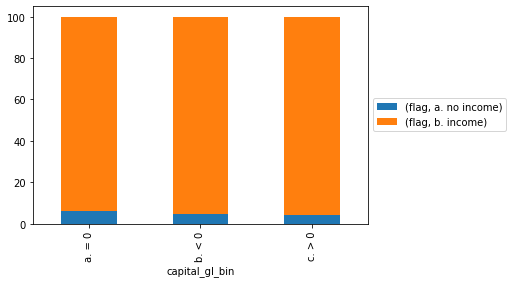

In [22]:
#2.Capital Gain/Loss: capital_gl_bin 
table_c2 = census_csv.pivot_table(values=['flag'],
                                 index=['capital_gl_bin'], 
                                 columns=['workclass_bin'],
                                 aggfunc='count')
table_c2 = table_c2.apply(lambda c: c / c.sum() * 100, axis=1)
table_c2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

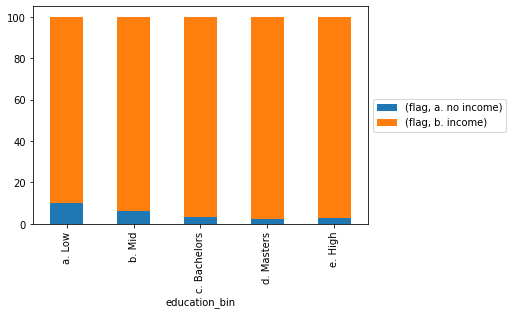

In [23]:
#3.Education: education_bin
table_e2 = census_csv.pivot_table(values=['flag'],
                                 index=['education_bin'], 
                                 columns=['workclass_bin'],
                                 aggfunc='count')
table_e2 = table_e2.apply(lambda c: c / c.sum() * 100, axis=1)
table_e2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

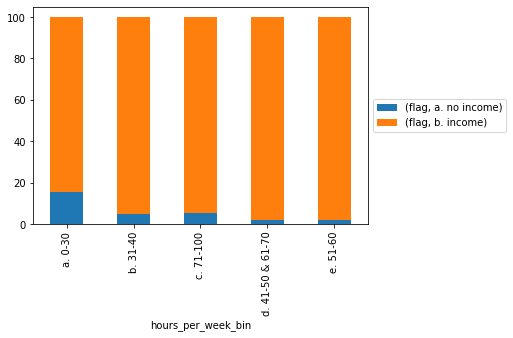

In [24]:
#4.Hours per week: hours_per_week_bin
table_h2 = census_csv.pivot_table(values=['flag'],
                                 index=['hours_per_week_bin'], 
                                 columns=['workclass_bin'],
                                 aggfunc='count')
table_h2 = table_h2.apply(lambda c: c / c.sum() * 100, axis=1)
table_h2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

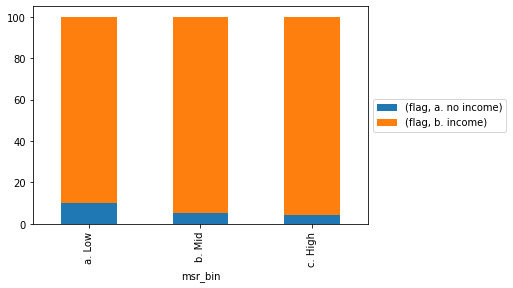

In [25]:
#5.Marriage Status&relationship :msr_bin 
table_m2 = census_csv.pivot_table(values=['flag'],
                                 index=['msr_bin'], 
                                 columns=['workclass_bin'],
                                 aggfunc='count')
table_m2 = table_m2.apply(lambda c: c / c.sum() * 100, axis=1)
table_m2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

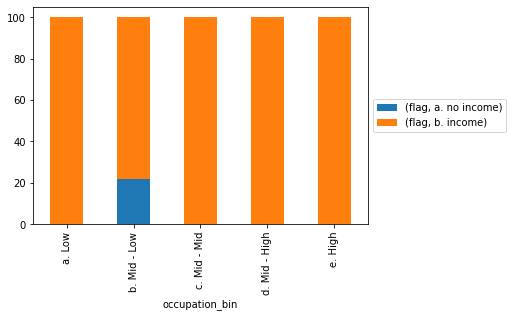

In [26]:
#6.Occupation: occupation_bin
table_o2 = census_csv.pivot_table(values=['flag'],
                                 index=['occupation_bin'], 
                                 columns=['workclass_bin'],
                                 aggfunc='count')
table_o2 = table_o2.apply(lambda c: c / c.sum() * 100, axis=1)
table_o2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

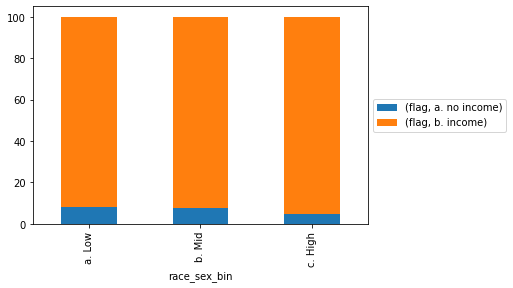

In [27]:
#7.Race&Sex: race_sex_bin
table_r2 = census_csv.pivot_table(values=['flag'],
                                 index=['race_sex_bin'], 
                                 columns=['workclass_bin'],
                                 aggfunc='count')
table_r2 = table_r2.apply(lambda c: c / c.sum() * 100, axis=1)
table_r2.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#Build Decision Tree Classifier Models

In [28]:
#import decision tree package 
from sklearn.tree import DecisionTreeClassifier
#import other sklearn package that may be needed 
from sklearn.datasets import load_iris 
    #load and return the iris dataset
    #(a classic and very easy multi-class classification dataset)
from sklearn.model_selection import train_test_split
    #split arrays or matrices into random train and test subsets 
from sklearn.externals.six import StringIO
    #provides means of working with text in memory using the file API(read, write etc.)
from sklearn.tree import export_text
    #the package build a text report showing the rules of a decision tree

In [ ]:
#use LabelEncoderer to transform non-numerical labels into numerical labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_le = train_csv.apply(le.fit_transform)

#split data 
#train_csv.head()
XL = train_le.loc[:,'hours_per_week_bin':'age_bin']
yL = train_le.loc[:,'y']

X_train,X_test,y_train,y_test = train_test_split(XL, yL, random_state = 0)

In [30]:
#create decision tree model 
dtree = DecisionTreeClassifier(max_depth = 10, 
                              random_state=101,
                              max_features = None, 
                              min_samples_leaf = 15)
#train the model by using fit method
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)



#Visualize Decision Tree Using GraphViz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.930643 to fit



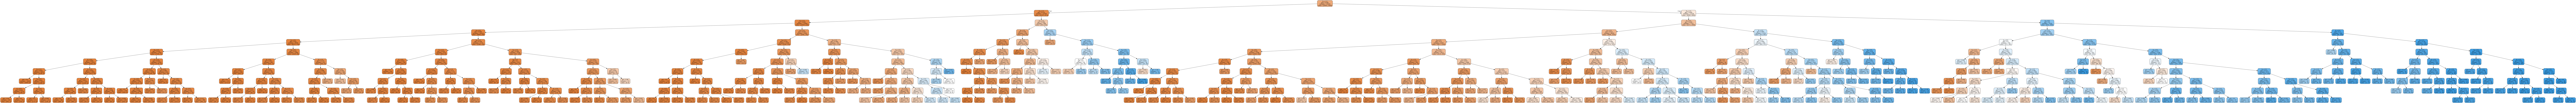

In [31]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, 
                out_file = dot_data,
                filled = True, 
                rounded = True,
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

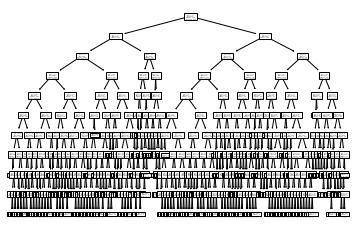

In [32]:
#another way: plot with matplotlib
from sklearn import tree
tree.plot_tree(dtree);

#Evaluate Decision Tree Performance

In [35]:
#display confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[5703  456]
 [ 833 1149]]


Out of the 6159 actual instances of ‘0’ (first row), the classifier predicted correctly 5703 of them.

Out of the 1982 actual instances of ‘1’ (second row), the classifier predicted correctly 1149 of them.

Out of all 8141 emails, the classifier predicted correctly 6852 of them.

In [34]:
#summary of the predictions made by the classifier 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#accuracy score 
from sklearn.metrics import accuracy_score
print('Accuracy is', accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6159
           1       0.72      0.58      0.64      1982

    accuracy                           0.84      8141
   macro avg       0.79      0.75      0.77      8141
weighted avg       0.83      0.84      0.84      8141

Accuracy is 0.8416656430413954


Our algorithm has an accuracy of 99%, i.e. for each 100 y it classified, 84 were correctly classified.

Precision: When it predicts the positive result, how often is it correct?

Recall: When it is actually the positive result, how often does it predict correctly? Recall is also known as “sensitivity” and “true positive rate” (TPR).

F1 Score: harmonic mean of precision and recall, useful when you need to take both precision and recall into account.



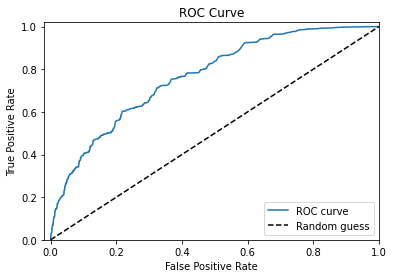

In [41]:
#the predicted probability for the test set (implement naive bayes)
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_prob = nb.predict_proba(X_test)[:,1]
    #array([0.19031066, 0.24125423, 0.17787494, ..., 0.21715392, 0.22243695,
       #0.18739169])

#AUC Value, ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")



The point of perfect classification: the top-left corner of the plot where the TP rate is 1 and the FP rate is 0 — that is, no 1 are classified as 0 and no 0 are classified as 1. 

In [42]:
#AUC Value (area under the ROC curve)
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.7654395731415505

Our classifier is somewhat good at minimizing false negatives and true negatives with this AUC Value.

#Tune Decision Tree Performance


In [ ]:
#4 Hyperparameters to vary: Split Criteria, Minimum Sample Split, 
    #Minimum sample leaf, Maximum Depth.
    
#GridSearchCV is a method used to tune our hyperparameters. 
#We can pass different values of hyperparameters as parameters for grid search. 
#It does a exhaustive generation of combination of different parameters passed. 
#Using cross validation score, Grid Search returns the combination of 
    #hyperparameters for which the model is performing the best.

In [92]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],'splitter' : ['best', 'random']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=101), 
                              params, verbose=1, cv=None)
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=101,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                 

In [93]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='random')

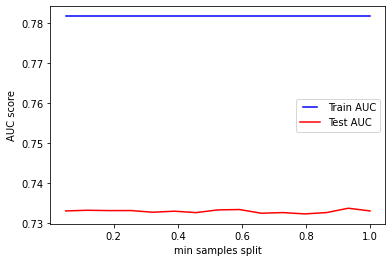

In [84]:
#Visualize hyperparameter choosing:

#Minimum Sample Split
#When we increase this parameter, the tree becomes more constrained 
    #as it has to consider more samples at each node.

min_samples_splits = np.linspace(0.05, 1.0, 15, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
   dtree = DecisionTreeClassifier(max_depth=max_depth)
   dtree.fit(X_train, y_train)
   train_pred = dtree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dtree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc) #roc_auc: 0.7331049669463883

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

#When consider mini samples split, training sample seems work pretty stable,
    #while tesing sample works best (learn enough) around consider 
        #90% of the samples at each node.

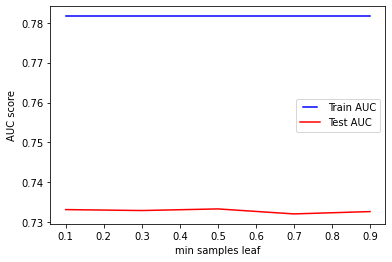

In [105]:
#Minimum Sample Leaf
#similar to min_samples_splits 
#but describe the minimum number of samples at the leafs, the base of the tree

min_samples_leafs = np.linspace(0.1, 0.9, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dtree = DecisionTreeClassifier(max_depth=max_depth)
   dtree.fit(X_train, y_train)
   train_pred = dtree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dtree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc) #roc_auc:0.7331948733601603

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

#The result is very similar to min_samples_splits'.
#When consider mini samples leaf, training sample seems work pretty stable,
    #while tesing sample works best (learn enough) around the value of 0.3.

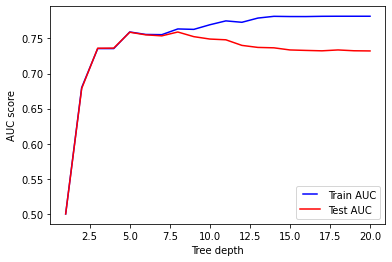

In [75]:
#Maximum Depth
#The deeper the tree, the more splits it has and it captures more information about the data. 
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dtree = DecisionTreeClassifier(max_depth=max_depth)
   dtree.fit(X_train, y_train)
   train_pred = dtree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dtree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc) #roc_auc: 0.7321857916245397

#plot the training and test auc scores
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
%matplotlib inline

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

#our model overfits for slightly large depth values

In [114]:
#Performance Case By Case - Hyperparameters

#Entropy Criteria
dtree = DecisionTreeClassifier(criterion='entropy',
                               max_depth=20,
                               min_samples_leaf=10, 
                               min_samples_split=10)
#train the model by using fit method
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [115]:
#Entropy Group 1-4 
#summary of the predictions made by the classifier 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#accuracy score 
from sklearn.metrics import accuracy_score
print('Accuracy is', accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6159
           1       0.72      0.57      0.64      1982

    accuracy                           0.84      8141
   macro avg       0.79      0.75      0.77      8141
weighted avg       0.83      0.84      0.83      8141

Accuracy is 0.8405601277484338


In [130]:
#Gini Criteria
dtree = DecisionTreeClassifier(criterion='gini',
                               max_depth=35,
                               min_samples_leaf=30, 
                               min_samples_split=30)
#train the model by using fit method
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

In [123]:
#Gini Group 1-4 
#summary of the predictions made by the classifier 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#accuracy score 
from sklearn.metrics import accuracy_score
print('Accuracy is', accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6159
           1       0.72      0.58      0.64      1982

    accuracy                           0.84      8141
   macro avg       0.80      0.75      0.77      8141
weighted avg       0.84      0.84      0.84      8141

Accuracy is 0.8426483233018057


In [126]:
#check performace for parameter given by GridSearchCV
dtree = DecisionTreeClassifier(ccp_alpha=0.0, 
                               class_weight=None, 
                               criterion='gini',
                               max_depth=None, 
                               max_features=None, 
                               max_leaf_nodes=None,
                               min_impurity_decrease=0.0, 
                               min_impurity_split=None,
                               min_samples_leaf=1, 
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, 
                               presort='deprecated',
                               random_state=101, 
                               splitter='random')
#train the model by using fit method
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)



In [125]:
#Performance of the GridSearchCV decision tree
#summary of the predictions made by the classifier 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#accuracy score 
from sklearn.metrics import accuracy_score
print('Accuracy is', accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6159
           1       0.69      0.55      0.61      1982

    accuracy                           0.83      8141
   macro avg       0.78      0.73      0.75      8141
weighted avg       0.82      0.83      0.82      8141

Accuracy is 0.8296278098513696


#Conclusion 

### How long was your total run time to train the model? 
I'm not sure about the total run time to train the model. If it's assuming the running time to train the model in the background, I think it would be about 5 seconds in total. If it's assuming the total running time to train the model in the respect of person who impleted the training, I think it would be around two hours to train for me.

### Did you find the BEST TREE? 

As far as I'm considering, I think the tree that I got at last in the group of using Gini Impurity as criteria is the best tree so far.

### Draw Graph of Best Tree Using GraphViz

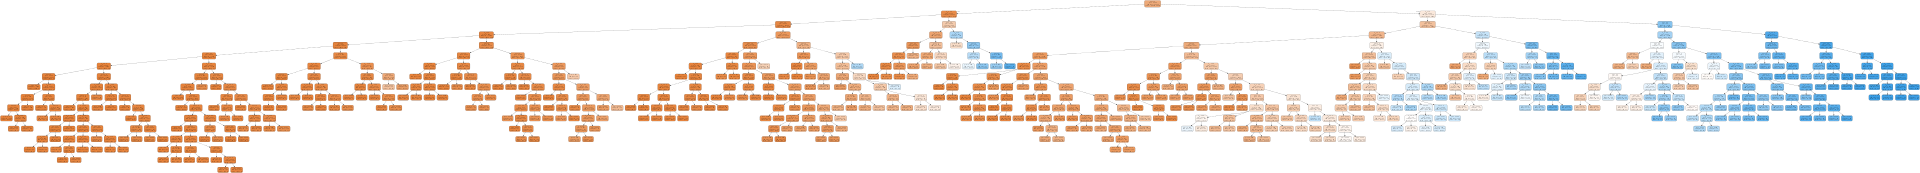

In [132]:
dot_data = StringIO()

export_graphviz(dtree, 
                out_file = dot_data,
                filled = True, 
                rounded = True,
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_size('"20,20!"')
Image(graph.create_png())

###What makes it the best tree?

For this dataset, I'm not very sure about between recall and precision, which one is more important in this case. So I decide to use all of the three. Having a higher Recall means there are less FALSE NEGATIVES, and having higher Precision means there are less FALSE POSITIVES. Furthermore, harmonic mean of precision and recall. With all these being considered, I assume that my 4th Gini tree is the best tree so far.

#Automation of Performance Tuning
